## 📊 Restaurant Rating Prediction

In [1]:
# 1. 📥 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [5]:
# 2. Load Dataset
# df = pd.read_excel("Dataset .xls", engine="xlrd")
# df.head()

In [6]:
#2.Load Data set
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [8]:
# 3. Select and Clean Relevant Features
df = df[['Average Cost for two', 'Price range', 'Has Table booking', 'Has Online delivery',
         'Votes', 'City', 'Cuisines', 'Aggregate rating']]

In [9]:
df.dropna(inplace=True)

In [10]:
# 4. Encode Categorical Features
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})


In [11]:
!pip install scikit-learn

In [12]:
# Use Label Encoding for 'City' and 'Cuisines'
from sklearn.preprocessing import LabelEncoder
le_city = LabelEncoder()
le_cuisine = LabelEncoder()

In [13]:
df['City'] = le_city.fit_transform(df['City'])
df['Cuisines'] = le_cuisine.fit_transform(df['Cuisines'])

In [14]:
# 5. Define Features and Target
X = df[['Average Cost for two', 'Price range', 'Has Table booking',
        'Has Online delivery', 'Votes', 'City', 'Cuisines']]
y = df['Aggregate rating']

In [15]:
# 6. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# 8. Train Model
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,6
,min_impurity_decrease,0.0
,init,None


In [18]:
# 9. Evaluate Model
y_pred = model.predict(X_test)

In [19]:
print("✅ Evaluation:")
print("MAE:", round(mean_absolute_error(y_test, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))
print("R2 Score:", round(r2_score(y_test, y_pred), 3))

✅ Evaluation:
MAE: 0.2
RMSE: 0.301
R2 Score: 0.96


In [20]:
# 10. Feature Importance
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

C:\Users\Admin\AppData\Local\Temp\ipykernel_6340\1216367268.py:5: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\anaconda3\envs\py311env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


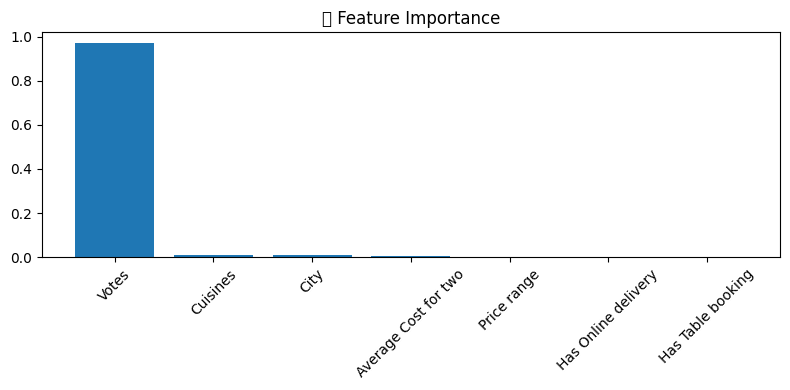

In [21]:
plt.figure(figsize=(8, 4))
plt.title("🔍 Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# pip install jupyter streamlit pandas numpy scikit-learn matplotlib seaborn openpyxl joblib

In [24]:
# python -m ipykernel install --user --name=py311env --display-name "Python 3.11 (Streamlit)"

SyntaxError: invalid syntax (2301442803.py, line 1)

In [25]:
# 11. Save Model and Scaler
joblib.dump(model, "restaurant_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_city, "city_encoder.pkl")
joblib.dump(le_cuisine, "cuisine_encoder.pkl")

['cuisine_encoder.pkl']

In [ ]:
!streamlit run app.py

In [4]:
!python --version


Python 3.12.7
